In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.formula.api import ols
from datetime import datetime

In [3]:
# importing csv file
df = pd.read_csv("world_population.csv")

In [4]:
# inspecting the data type of each column
print(df.dtypes)
df.head()

Rank                             int64
CCA3                            object
Country/Territory               object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [5]:
# renaming column with "/"
df.rename(columns={"Country/Territory" : "Country"}, inplace=True)

# renaming year population columns
for col in df.columns:
    if 'Population' in col:
        df = df.rename(columns={col: col.split(' ')[0]})
        
df.head()

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [6]:
# inspecting the data type of each column again
print(df.dtypes)

# convert year columns to strings
df.columns = list(map(str, df.columns))


Rank                   int64
CCA3                  object
Country               object
Capital               object
Continent             object
2022                   int64
2020                   int64
2015                   int64
2010                   int64
2000                   int64
1990                   int64
1980                   int64
1970                   int64
Area (km²)             int64
Density (per km²)    float64
Growth Rate          float64
World                float64
dtype: object


In [7]:
print(df.shape)

# getting the number of unique values in each column and checking against the shape of dataset
print(df.nunique())

# getting the number of missing values in each column
df.isnull().sum()
    

(234, 17)
Rank                 234
CCA3                 234
Country              234
Capital              234
Continent              6
2022                 234
2020                 234
2015                 234
2010                 234
2000                 234
1990                 234
1980                 234
1970                 234
Area (km²)           233
Density (per km²)    234
Growth Rate          180
World                 70
dtype: int64


Rank                 0
CCA3                 0
Country              0
Capital              0
Continent            0
2022                 0
2020                 0
2015                 0
2010                 0
2000                 0
1990                 0
1980                 0
1970                 0
Area (km²)           0
Density (per km²)    0
Growth Rate          0
World                0
dtype: int64

In [8]:
# Analyzing Population for each Continent
continent_df = df.groupby('Continent')[df.columns].sum().sort_values(by='2022', ascending=False)
continent_df.style.background_gradient(cmap = "PuBu")

,Rank,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World
Continent,,,,,,,,,,,,,
Asia,3878,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290,32138141,51251.206800,50.469200,59.190000
Africa,5253,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348,30317963,7127.715800,58.210900,17.870000
Europe,6225,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991,23010411,33166.237100,50.112800,9.330000
North America,6437,600296136,594236593,570383850,542720651,486069584,421266425,368293361,315434606,24244178,10910.470300,40.167000,7.510000
South America,1366,436816608,431530043,413134396,393078250,349634282,297146415,241789006,192947156,17833382,293.607700,14.111400,5.480000
Oceania,4336,45038554,43933426,40403283,37102764,31222778,26743822,22920240,19480270,8515081,3048.490500,23.169800,0.550000


In [9]:
# Analyzing Population for each Country
country_df = df.groupby('Country')[df.columns].sum()
country_df.style.background_gradient(cmap = 'PuRd')


,Rank,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World
Country,,,,,,,,,,,,,
Afghanistan,36,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.058700,1.025700,0.520000
Albania,138,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.870200,0.995700,0.040000
Algeria,34,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.853100,1.016400,0.560000
American Samoa,213,44273,46189,51368,54849,58230,47818,32886,27075,199,222.477400,0.983100,0.000000
Andorra,203,79824,77700,71746,71519,66097,53569,35611,19860,468,170.564100,1.010000,0.000000
Angola,42,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.546600,1.031500,0.450000
Anguilla,224,15857,15585,14525,13172,11047,8316,6560,6283,91,174.252700,1.006600,0.000000
Antigua and Barbuda,201,93763,92664,89941,85695,75055,63328,64888,64516,442,212.133500,1.005800,0.000000
Argentina,33,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.368300,1.005200,0.570000


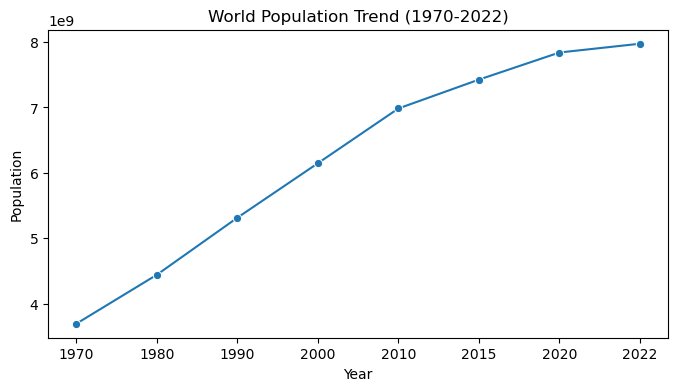

In [10]:
# Visualizing world population trend from 1970 to 2022
trends = df.iloc[:,5:13].sum()[::-1]
plt.subplots(figsize=(8, 4))
sns.lineplot(x=trends.index, y=trends.values,  marker="o")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("World Population Trend (1970-2022)")
plt.show()

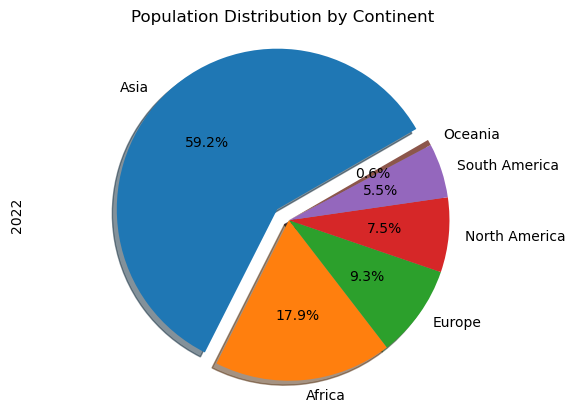

In [11]:
# visualizing distribution of world population by continent in 2022
continent_df['2022'].plot(kind='pie', explode=(0.1,0,0,0,0,0), shadow=True, startangle=30, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Population Distribution by Continent')
plt.show()

/var/folders/bm/9qq2hzt127x2b5gb6g5gj2zm0000gn/T/ipykernel_1723/462851700.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) + 'B' for x in plt.gca().get_yticks()/1000000000])


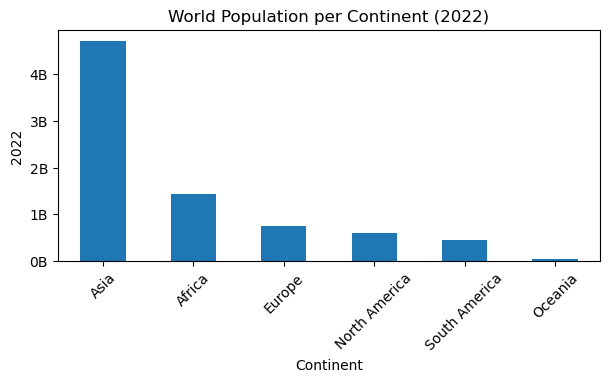

In [12]:
# visualizing world population by continent in 2022
plt.subplots(figsize=(7,3))
continent_df['2022'].plot(kind='bar')
plt.xticks(rotation=45)
plt.gca().set_yticklabels(['{:.0f}'.format(x) + 'B' for x in plt.gca().get_yticks()/1000000000])
plt.ylabel('2022')
plt.title('World Population per Continent (2022)')
plt.show()


In [13]:
# renaming 2 complicated columns
continent_df.rename(columns={'Area (km²)':'Area', 'Density (per km²)': 'Density'}, inplace=True)
display(continent_df)

,Rank,2022,2020,2015,2010,2000,1990,1980,1970,Area,Density,Growth Rate,World
Continent,,,,,,,,,,,,,
Asia,3878,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290,32138141,51251.2068,50.4692,59.19
Africa,5253,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348,30317963,7127.7158,58.2109,17.87
Europe,6225,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991,23010411,33166.2371,50.1128,9.33
North America,6437,600296136,594236593,570383850,542720651,486069584,421266425,368293361,315434606,24244178,10910.4703,40.1670,7.51
South America,1366,436816608,431530043,413134396,393078250,349634282,297146415,241789006,192947156,17833382,293.6077,14.1114,5.48
Oceania,4336,45038554,43933426,40403283,37102764,31222778,26743822,22920240,19480270,8515081,3048.4905,23.1698,0.55


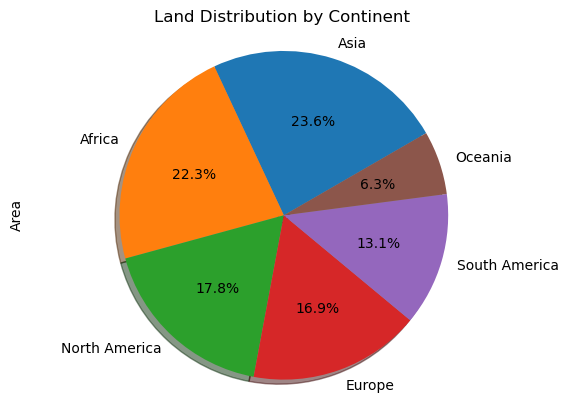

In [14]:
area_df = continent_df.sort_values(by='Area', ascending=False)
area_df['Area'].plot(kind='pie', shadow=True, startangle=30, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Land Distribution by Continent')
plt.show()

In [15]:
# finding out the average growth rate
print(df['Growth Rate'].mean())

1.0095773504273502


In [16]:
# visualizing growth rate of countries around the world
fig = px.choropleth(df, locations='Country', locationmode='country names', color='Growth Rate', hover_name='Country', 
                    color_continuous_scale='PuBuGn', title='Growth Rate')
fig.update_layout(title_font_size=20, autosize=True)

In [17]:
# visualizing area distribution of countries around the world
fig = px.choropleth(df, locations='Country', locationmode='country names', color='Area (km²)',
                    color_continuous_scale='PuRd', title='Area (km²)')
fig.update_layout(title_font_size=20, autosize=True)

### Population Percentage Change Decade-by-Decade

In [18]:
# creating a DataFrame for population of each decade per continent
pop_diff = df.groupby('Continent')[['1970','1980','1990','2000','2010','2020']].sum().reset_index()
display(pop_diff)

,Continent,1970,1980,1990,2000,2010,2020
0,Africa,365444348,481536377,638150629,818946032,1055228072,1360671810
1,Asia,2144906290,2635334228,3210563577,3735089604,4220041327,4663086535
2,Europe,655923991,692527159,720320797,726093423,735613934,745792196
3,North America,315434606,368293361,421266425,486069584,542720651,594236593
4,Oceania,19480270,22920240,26743822,31222778,37102764,43933426
5,South America,192947156,241789006,297146415,349634282,393078250,431530043


In [19]:
# calculating decade-by-decade population percentage change
pop_diff['70s'] = (pop_diff['1980'] / pop_diff['1970'] - 1) * 100
pop_diff['80s'] = (pop_diff['1990'] / pop_diff['1980'] - 1) * 100
pop_diff['90s'] = (pop_diff['2000'] / pop_diff['1990'] - 1) * 100
pop_diff['00s'] = (pop_diff['2010'] / pop_diff['2000'] - 1) * 100
pop_diff['10s'] = (pop_diff['2020'] / pop_diff['2010'] - 1) * 100

display(pop_diff.head())

,Continent,1970,1980,1990,2000,2010,2020,70s,80s,90s,00s,10s
0,Africa,365444348,481536377,638150629,818946032,1055228072,1360671810,31.767362,32.523867,28.331149,28.851967,28.945756
1,Asia,2144906290,2635334228,3210563577,3735089604,4220041327,4663086535,22.864772,21.827567,16.337506,12.983670,10.498599
2,Europe,655923991,692527159,720320797,726093423,735613934,745792196,5.580398,4.013364,0.801397,1.311196,1.383642
3,North America,315434606,368293361,421266425,486069584,542720651,594236593,16.757437,14.383388,15.382939,11.654929,9.492165
4,Oceania,19480270,22920240,26743822,31222778,37102764,43933426,17.658739,16.682120,16.747629,18.832360,18.410116


In [20]:
# creating a DataFrame for decade-by-decade percentage change
dec_diff = pop_diff[['Continent','70s','80s','90s','00s','10s']].set_index('Continent')
display(dec_diff)

# take a look at the statistical summary
print(dec_diff.describe())

,70s,80s,90s,00s,10s
Continent,,,,,
Africa,31.767362,32.523867,28.331149,28.851967,28.945756
Asia,22.864772,21.827567,16.337506,12.983670,10.498599
Europe,5.580398,4.013364,0.801397,1.311196,1.383642
North America,16.757437,14.383388,15.382939,11.654929,9.492165
Oceania,17.658739,16.682120,16.747629,18.832360,18.410116
South America,25.313589,22.894924,17.663975,12.425546,9.782224


             70s        80s        90s        00s        10s
count   6.000000   6.000000   6.000000   6.000000   6.000000
mean   19.990383  18.720872  15.877432  14.343278  13.085417
std     8.931204   9.559059   8.795306   9.091122   9.458842
min     5.580398   4.013364   0.801397   1.311196   1.383642
25%    16.982762  14.958071  15.621581  11.847584   9.564680
50%    20.261756  19.254844  16.542567  12.704608  10.140411
75%    24.701385  22.628085  17.434888  17.370188  16.432237
max    31.767362  32.523867  28.331149  28.851967  28.945756


In [21]:
# transpose the DataFrame
dec_diff_t = dec_diff.T
display(dec_diff_t)

Continent,Africa,Asia,Europe,North America,Oceania,South America
70s,31.767362,22.864772,5.580398,16.757437,17.658739,25.313589
80s,32.523867,21.827567,4.013364,14.383388,16.682120,22.894924
90s,28.331149,16.337506,0.801397,15.382939,16.747629,17.663975
00s,28.851967,12.983670,1.311196,11.654929,18.832360,12.425546
10s,28.945756,10.498599,1.383642,9.492165,18.410116,9.782224


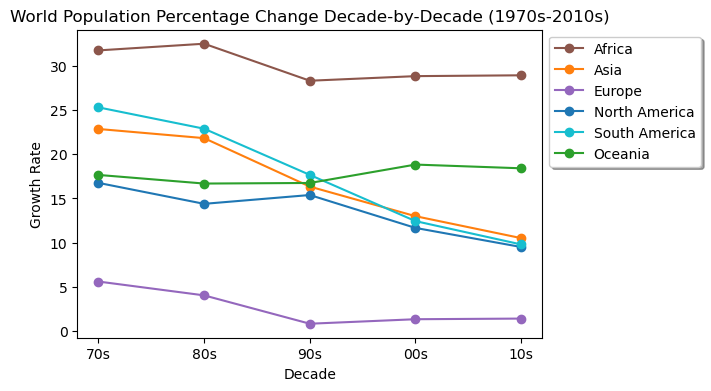

In [22]:
plt.subplots(figsize=(6,4))
plt.plot(dec_diff_t['Africa'], label="Africa", marker='o', color='tab:brown')
plt.plot(dec_diff_t['Asia'], label="Asia", marker='o', color='tab:orange')
plt.plot(dec_diff_t['Europe'], label="Europe", marker='o', color='tab:purple')
plt.plot(dec_diff_t['North America'], label="North America", marker='o', color='tab:blue')
plt.plot(dec_diff_t['South America'], label="South America", marker='o', color='tab:cyan')
plt.plot(dec_diff_t['Oceania'], label="Oceania", marker='o', color='tab:green')

plt.xlabel('Decade')
plt.ylabel('Growth Rate')
plt.title('World Population Percentage Change Decade-by-Decade (1970s-2010s)')
plt.legend(bbox_to_anchor=(1,1), shadow=True)
plt.show()

### Top 10 Countries with the greatest population

In [23]:
# make a copy of the original DataFrame
df_copy = df.copy()

# setting 'country' column as index
df_copy.set_index('Country', inplace=True)

# sorting by population in 2022
df_copy.sort_values(by='2022', ascending=False, inplace=True)
top_10_pop = df_copy['2022'].head(10)
top_10_pop = top_10_pop.sort_values(ascending=True)
print(top_10_pop)

Country
Mexico            127504125
Russia            144713314
Bangladesh        171186372
Brazil            215313498
Nigeria           218541212
Pakistan          235824862
Indonesia         275501339
United States     338289857
India            1417173173
China            1425887337
Name: 2022, dtype: int64


/var/folders/bm/9qq2hzt127x2b5gb6g5gj2zm0000gn/T/ipykernel_1723/765399334.py:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



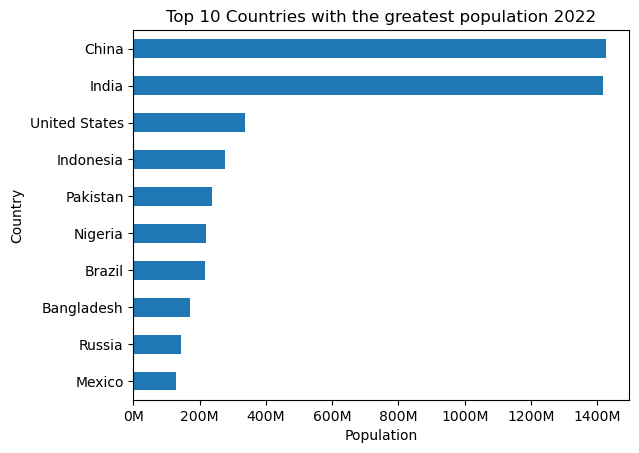

In [24]:
# plotting top 10 countries with the greatest population
top_10_pop.plot(kind='barh')
plt.gca().set_xticklabels(['{:.0f}'.format(x) + 'M' for x in plt.gca().get_xticks()/1000000])
plt.xlabel('Population')
plt.title('Top 10 Countries with the greatest population 2022')
plt.show()

Country,China,India,United States,Indonesia,Pakistan,Nigeria,Brazil,Bangladesh,Russia,Mexico
2022,1425887337,1417173173,338289857,275501339,235824862,218541212,215313498,171186372,144713314,127504125
2020,1424929781,1396387127,335942003,271857970,227196741,208327405,213196304,167420951,145617329,125998302
2015,1393715448,1322866505,324607776,259091970,210969298,183995785,205188205,157830000,144668389,120149897
2010,1348191368,1240613620,311182845,244016173,194454498,160952853,196353492,148391139,143242599,112532401
2000,1264099069,1059633675,282398554,214072421,154369924,122851984,175873720,129193327,146844839,97873442
1990,1153704252,870452165,248083732,182159874,115414069,95214257,150706446,107147651,148005704,81720428
1980,982372466,696828385,223140018,148177096,80624057,72951439,122288383,83929765,138257420,67705186
1970,822534450,557501301,200328340,115228394,59290872,55569264,96369875,67541860,130093010,50289306


/var/folders/bm/9qq2hzt127x2b5gb6g5gj2zm0000gn/T/ipykernel_1723/3083272970.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



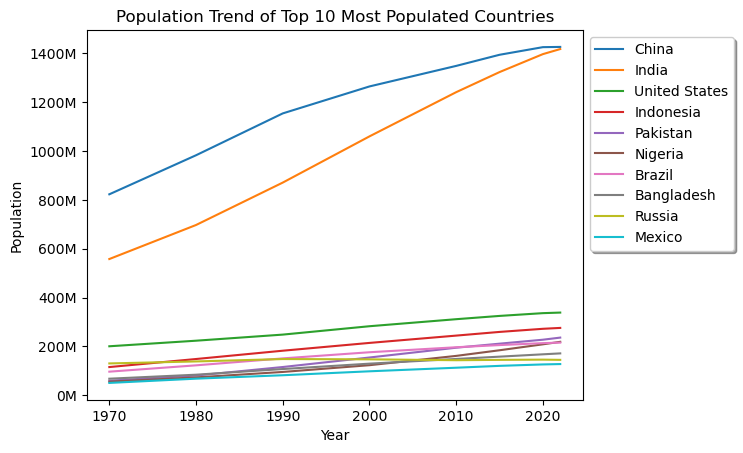

In [25]:
df_top_10 = df_copy.head(10)
df_top_10 = df_top_10[['2022','2020','2015','2010','2000','1990','1980','1970']].T
display(df_top_10)

df_top_10.index = df_top_10.index.map(int)
df_top_10.plot()

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend of Top 10 Most Populated Countries')
plt.gca().set_yticklabels(['{:.0f}'.format(x) + 'M' for x in plt.gca().get_yticks()/1000000]) 
plt.legend(bbox_to_anchor=(1,1), shadow=True)
plt.show()

## World Population Projection for 2030

In [26]:
# current population in the world
df['2022'].sum()

7973413042

In [27]:
# creating a DataFrame for total population in the world
df_total = pd.DataFrame(df[['2022','2020','2015','2010','2000','1990','1980','1970']].sum(axis=0))

df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype('int')
print(df_total)
print(df_total.dtypes)

   year       total
0  2022  7973413042
1  2020  7839250603
2  2015  7424809761
3  2010  6983784998
4  2000  6147055703
5  1990  5314191665
6  1980  4442400371
7  1970  3694136661
year     int64
total    int64
dtype: object


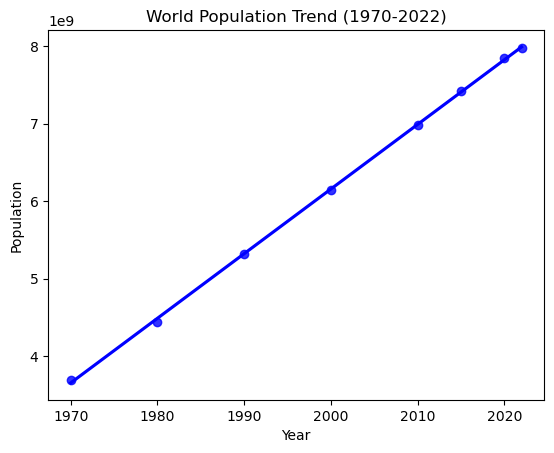

In [28]:
# plotting world population trend 
sns.regplot(x='year', y='total', data=df_total, color='b', ci=None)
plt.title('World Population Trend (1970-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [29]:
# running linear regression model 
mdl_pop_vs_year = ols("total ~ year", data=df_total).fit()
mdl_pop_vs_year.params

Intercept   -1.605877e+11
year         8.337105e+07
dtype: float64

In [30]:
# creating an explanatory DataFrame
exp_df_1 = pd.DataFrame({"year": np.arange(1970,2051,10)})

# assigning explanatory DataFrame to prediction values
pred_df_1 = exp_df_1.assign(predicted_pop = mdl_pop_vs_year.predict(exp_df_1))
print(pred_df_1)

   year  predicted_pop
0  1970   3.653299e+09
1  1980   4.487010e+09
2  1990   5.320720e+09
3  2000   6.154431e+09
4  2010   6.988141e+09
5  2020   7.821852e+09
6  2030   8.655562e+09
7  2040   9.489272e+09
8  2050   1.032298e+10


/var/folders/bm/9qq2hzt127x2b5gb6g5gj2zm0000gn/T/ipykernel_1723/492812698.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



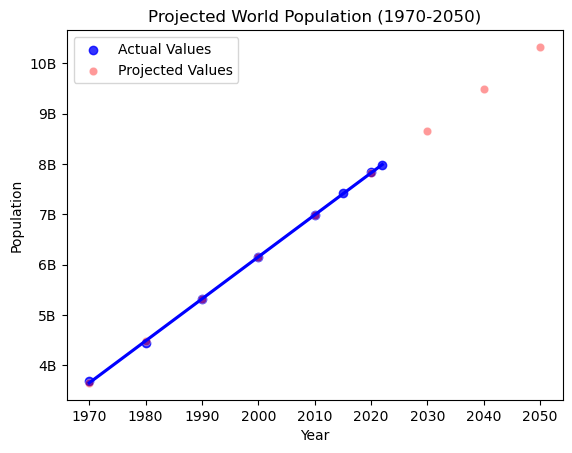

In [43]:
# visualizing predictions
fig = plt.figure()
sns.regplot(x='year', y='total', data=df_total, color='b', ci=None, label='Actual Values')
sns.scatterplot(x='year', y='predicted_pop', data=pred_df_1, color='r', markers='s', label='Projected Values', alpha=0.4)
plt.gca().set_yticklabels(['{:.0f}'.format(x) + 'B' for x in plt.gca().get_yticks()/1000000000]) 
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Projected World Population (1970-2050)')
plt.legend()
plt.show()

### Projections for the Top 2 Most Populated Countries - China & India

In [32]:
# creating DataFrame for China and India population over the years
df_top2 = pd.DataFrame(df_copy[['2022','2020','2015','2010','2000','1990','1980','1970']])

# swapping axes
df_top2 = df_top2.swapaxes("index","columns")
df_top2 = df_top2[['China', 'India']]

# reversing order of the DataFrame
df_top2 = df_top2[::-1]
df_top2.reset_index()
df_top2['Year'] = [1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022]


display(df_top2)

Country,China,India,Year
1970,822534450,557501301,1970
1980,982372466,696828385,1980
1990,1153704252,870452165,1990
2000,1264099069,1059633675,2000
2010,1348191368,1240613620,2010
2015,1393715448,1322866505,2015
2020,1424929781,1396387127,2020
2022,1425887337,1417173173,2022


/var/folders/bm/9qq2hzt127x2b5gb6g5gj2zm0000gn/T/ipykernel_1723/2539757666.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



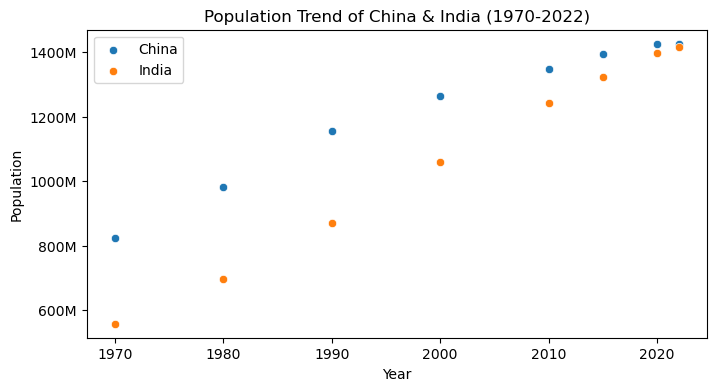

In [33]:
# plotting population trends of China and India
plt.subplots(figsize=(8,4))
sns.scatterplot(x='Year', y='China', data=df_top2, label='China')
sns.scatterplot(x='Year', y='India', data=df_top2, label='India')
plt.gca().set_yticklabels(['{:.0f}'.format(x) + 'M' for x in plt.gca().get_yticks()/1000000]) 
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend of China & India (1970-2022)')
plt.legend()
plt.show()

In [34]:
# modelling China's population growth
mdl_china = ols("China ~ Year", data=df_top2).fit()

# modelling India's population growth
mdl_india = ols("India ~ Year", data=df_top2).fit()

In [35]:
# creating an explanatory DataFrame again
exp_df = pd.DataFrame({"Year": np.arange(1970,2051,10)})

# assigning explanatory DataFrame to prediction values of China
pred_df_2 = exp_df.assign(predicted_pop_china = mdl_china.predict(exp_df))
print(pred_df_2)

# assigning explanatory DataFrame to prediction values of India
pred_df_3 = exp_df.assign(predicted_pop_india = mdl_india.predict(exp_df))
print(pred_df_3)

   Year  predicted_pop_china
0  1970         8.733653e+08
1  1980         9.878799e+08
2  1990         1.102395e+09
3  2000         1.216909e+09
4  2010         1.331424e+09
5  2020         1.445939e+09
6  2030         1.560453e+09
7  2040         1.674968e+09
8  2050         1.789482e+09
   Year  predicted_pop_india
0  1970         5.423604e+08
1  1980         7.133148e+08
2  1990         8.842691e+08
3  2000         1.055223e+09
4  2010         1.226178e+09
5  2020         1.397132e+09
6  2030         1.568087e+09
7  2040         1.739041e+09
8  2050         1.909995e+09


/var/folders/bm/9qq2hzt127x2b5gb6g5gj2zm0000gn/T/ipykernel_1723/2632343122.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



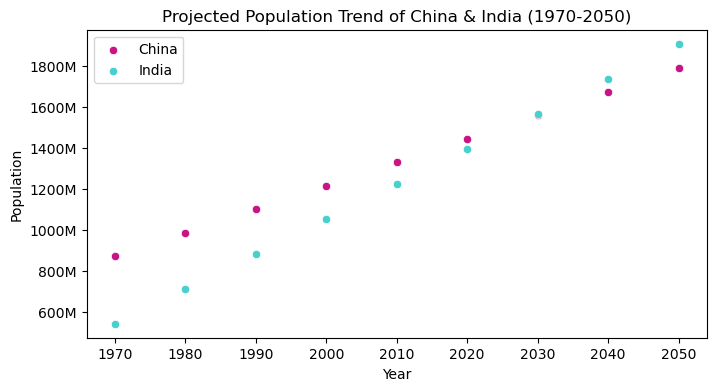

In [36]:
plt.subplots(figsize=(8,4))

sns.scatterplot(x='Year', y='predicted_pop_china', data=pred_df_2, label="China", color='mediumvioletred', markers='s')

sns.scatterplot(x='Year', y='predicted_pop_india', data=pred_df_3, label="India", color='mediumturquoise', markers='s')

plt.gca().set_yticklabels(['{:.0f}'.format(x) + 'M' for x in plt.gca().get_yticks()/1000000]) 
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Projected Population Trend of China & India (1970-2050)')
plt.legend()
plt.show()

### **What can we conclude?**
\
We see from the original dataset that
\
- China has a population of **1425887337** in year 2022.

- India has a population of **1417173173** in year 2022, which is just slightly behind China.
\
\
What's worth noting is that India experiences a higher growth rate than China. According to the projections, its total population
is expected to surpass China by 2030. 